# Наивный байесовский классификатор
## Цель работы
Научиться применять модели наивного байесовского классификатора с использованием библиотеки sklearn для решения задач машинного обучения.

## Содержание работы
1. Загрузите датасет breast_cancer из библиотеки sklearn.
2. Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.
3. Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.
4. Постройте ту же модель на полном датасете и сравните ее качество с первой.
5. Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer

### 1. Загрузите датасет breast_cancer из библиотеки sklearn.

In [3]:
data = load_breast_cancer()

In [4]:
X = data.data[:,:2]
y = data.target

In [5]:
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

### 2. Выведите в виде гистограммы распределения непрерывных атрибутов в этом наборе данных.

<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>

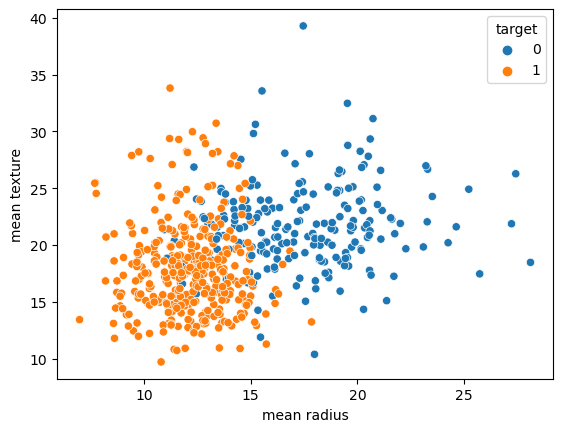

In [6]:
sns.scatterplot(x=df['mean radius'], y=df['mean texture'], hue=df['target'])

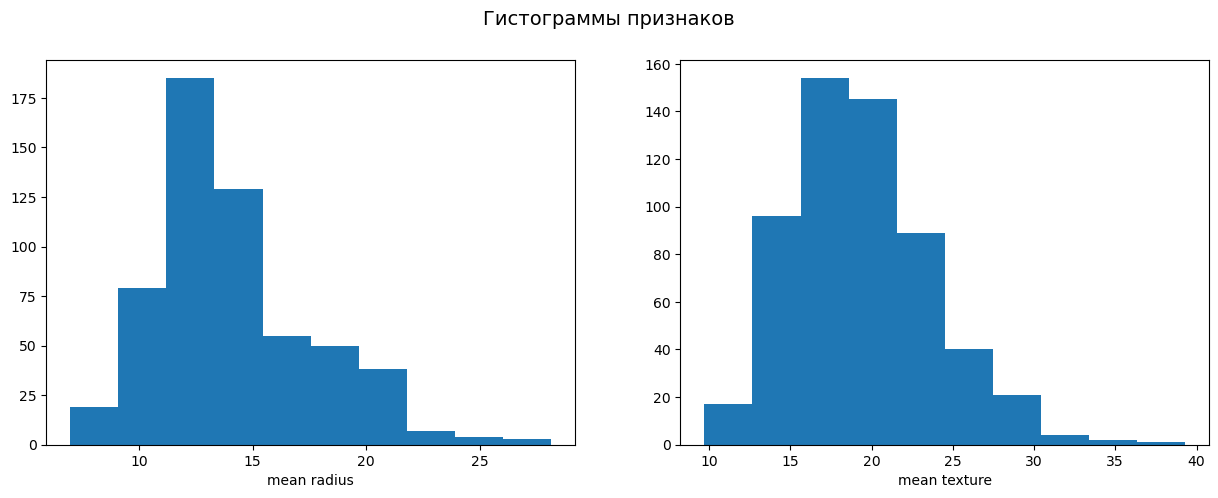

In [7]:
plt.figure(figsize=(15, 5))
for i in range(2):    
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### 3. Постройте модель наивного байесовского классификатора на первых двух столбцах и оцените ее качество.

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [9]:
gaussian_nb = GaussianNB()

In [10]:
gaussian_nb.fit(X, y)

GaussianNB()

In [11]:
y_pred = gaussian_nb.predict(X)

In [12]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


### 4. Постройте ту же модель на полном датасете и сравните ее качество с первой.

In [13]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [14]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


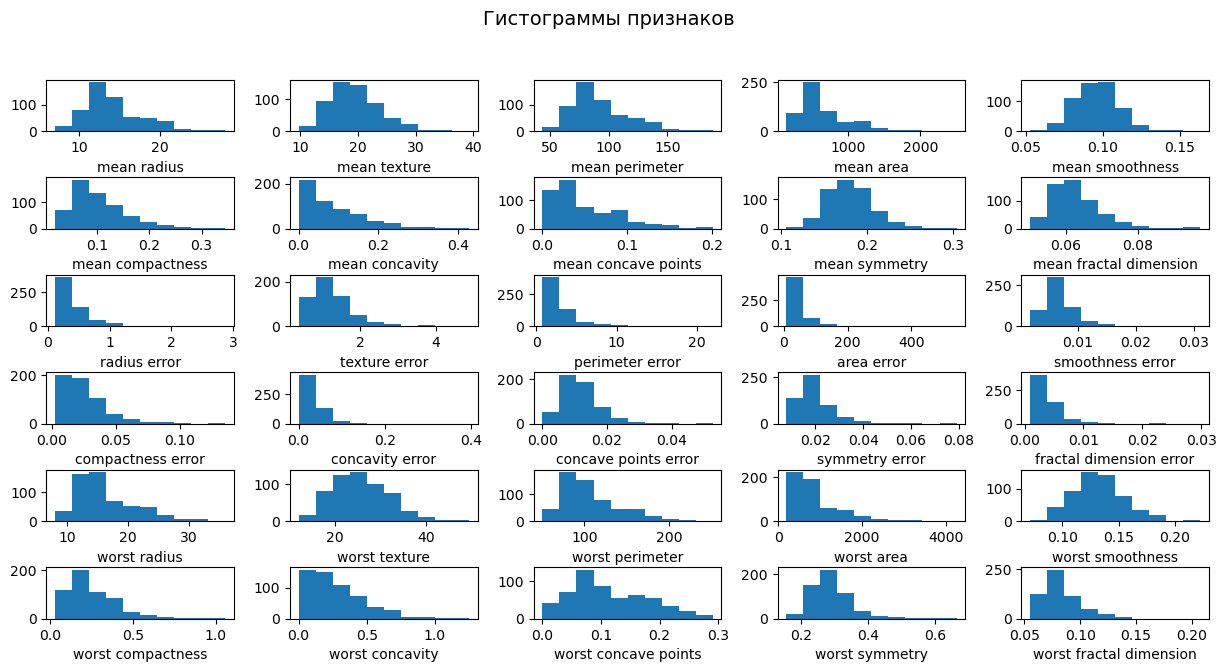

In [15]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])
    
    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)    
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

### 5. Отберите признаки, соответствующие выбранному модельному виду распределения. Постройте модель на выбранных признаках и сравните ее с предыдущей.

In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [17]:
df = df.drop(['mean concavity','radius error', 
              'perimeter error', 'area error', 
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area', 
              'worst concavity'], 
             axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [18]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


## Задания для самостоятельного выполнения

### 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [21]:
def apply_naive_bayes_models(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB(),
        "ComplementNB": ComplementNB()
    }
    
    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1_scor = f1_score(y_test, y_pred)
            print(f"{name} Accuracy: {acc:.4f}")
            print(f"{name} F1 score: {f1_scor:.4f}", end='\n\n')
        except Exception as e:
            print(f"{name} не применим: {e}")

In [22]:
apply_naive_bayes_models(X, y)

MultinomialNB Accuracy: 0.8684
MultinomialNB F1 score: 0.8951

BernoulliNB Accuracy: 0.6228
BernoulliNB F1 score: 0.7676

CategoricalNB не применим: index 1 is out of bounds for axis 1 with size 1
ComplementNB Accuracy: 0.8684
ComplementNB F1 score: 0.8951



### 2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм распределния эмпирических данных. / 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [23]:
titanic = pd.read_csv('data/titanic.csv')

In [24]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
titanic.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)  


In [27]:
titanic.fillna(titanic.mean(numeric_only=True), inplace=True)  

In [28]:
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)
label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
    label_encoders[col] = le

In [29]:
X = titanic.drop(columns=["Survived"])
y = titanic["Survived"]

In [30]:
apply_naive_bayes_models(X, y)

MultinomialNB Accuracy: 0.6983
MultinomialNB F1 score: 0.5846

BernoulliNB Accuracy: 0.7821
BernoulliNB F1 score: 0.7273

CategoricalNB Accuracy: 0.7598
CategoricalNB F1 score: 0.6950

ComplementNB Accuracy: 0.7039
ComplementNB F1 score: 0.6074



**1. Какие условия должны выполняться в данных, чтобы можно было применять наивную байесовскую модель?**

Наивная байесовская модель основывается на предположении, что признаки независимы друг от друга, что в реальных данных редко бывает точно. Однако, модель может хорошо работать даже при нарушении этого предположения. Условия для использования модели:
- **Независимость признаков**: Признаки должны быть условно независимыми при условии знания класса (это предположение наивности).
- **Категориальные или непрерывные признаки**: Наивная байесовская модель может работать с категориальными признаками, а для непрерывных признаков часто предполагается нормальное распределение или использование других распределений.

**2. Какие виды непрерывных распределений существуют и наиболее распространены?**

Существует несколько видов непрерывных распределений, среди которых:
- **Нормальное распределение (Гауссово)**: Самое распространенное, часто используется в наивном байесовском классификаторе для непрерывных признаков.
- **Экспоненциальное распределение**: Применяется для данных, которые могут принимать только положительные значения (например, время до события).
- **Равномерное распределение**: Все значения имеют одинаковую вероятность.
- **Гамма-распределение**: Для моделирования временных процессов или данных с положительным значением.
- **Логнормальное распределение**: Для данных, которые могут быть моделированы как логарифм нормального распределения.

**3. Как определить вид распределения численной переменной в датасете?**

Для определения типа распределения численных переменных в датасете можно использовать:
- **Визуализация**: Построение гистограмм, плотностей распределения или Q-Q графиков для оценки, насколько данные соответствуют определенному распределению.
- **Статистические тесты**: Например, тест Шапиро-Уилка, тест Колмогорова-Смирнова для проверки нормальности распределения.
- **Параметры распределения**: Если известно, что данные должны быть нормально распределены, можно вычислить параметры (среднее, стандартное отклонение) и проверить их с помощью статистических тестов или визуальных методов.

**4. Как наивная байесовская модель работает с категориальными признаками?**

Наивная байесовская модель применяет условную вероятность для каждого признака, используя формулу Байеса. Для категориальных признаков:
- Для каждого класса вычисляются вероятности каждого возможного значения признака в рамках этого класса.
- Используется частотный подход для оценки вероятности появления определенного значения признака в классе.
- Пример: Если признак категориальный (например, "цвет"), для каждого класса вычисляется вероятность того, что "цвет" будет равен "красный", "синий" и т.д.

**5. Зачем при применении наивного байесовского классификатора может понадобиться анализировать форму эмпирического распределения признаков?**

При использовании наивного байесовского классификатора важно понимать распределение признаков, особенно если они непрерывные, потому что:
- Модель предполагает, что признаки независимы. Если признаки сильно коррелированы, это может ухудшить производительность модели.
- Для непрерывных признаков важно оценить их распределение, чтобы выбрать подходящий способ моделирования (например, нормальное распределение, экспоненциальное и т.д.).
- Если данные не соответствуют предполагаемому распределению (например, нормальному), результаты классификации могут быть хуже, и стоит рассмотреть другие подходы, такие как преобразования данных.

**6. В чем особенность модели категориального наивного Байеса?**

Модель **категориального наивного Байеса** используется для классификации, когда все признаки категориальны. В отличие от стандартной наивной байесовской модели для непрерывных признаков, где используется предполагаемое распределение (например, нормальное), в модели категориального наивного Байеса:
- Для каждого признака вычисляется вероятность появления каждого возможного значения для каждого класса.
- Это означает, что для категориальных признаков вместо нормального распределения используется **дискретная модель**, где применяется условная вероятность для каждого категориального значения признака. 
- Пример: Для признака "цвет" с возможными значениями "красный", "синий" и "зеленый", модель вычисляет вероятность для каждого класса, что цвет будет красным, синим или зеленым, и учитывает эти вероятности при классификации.